# Mapping snRNA-seq data into RiemondyEtal2021 using Ingest

In [1]:
import os
os.chdir('../')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# import the required modules
import scanpy as sc
import torch
import scarches as sca
from scarches.dataset.trvae.data_handling import remove_sparsity
import matplotlib.pyplot as plt
import numpy as np
import gdown
import pandas as pd
import bbknn
import matplotlib
import scarches

In [3]:
# set the plotting parameters
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

## LOAD THE DATA

In [4]:
source_adata = sc.read('/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/RiemondyEtal2021_adata.h5ad')

In [5]:
target_adata = sc.read('/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/adata_nuclei_Celltype.h5ad')


In [6]:
var_names = source_adata.var_names.intersection(target_adata.var_names)
source_adata = source_adata[:, var_names]
target_adata = target_adata[:, var_names]

In [7]:
sc.pp.pca(source_adata)
sc.pp.neighbors(source_adata)
sc.tl.umap(source_adata, n_components=2, min_dist=0.1, spread=1.0, copy=False, random_state=0)

/home/przybilm/.local/lib/python3.7/site-packages/numba/core/typed_passes.py:332: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../.local/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/przybilm/.local/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../.local/lib/python3.7/site-packages/umap/utils.py", line 409:
@n

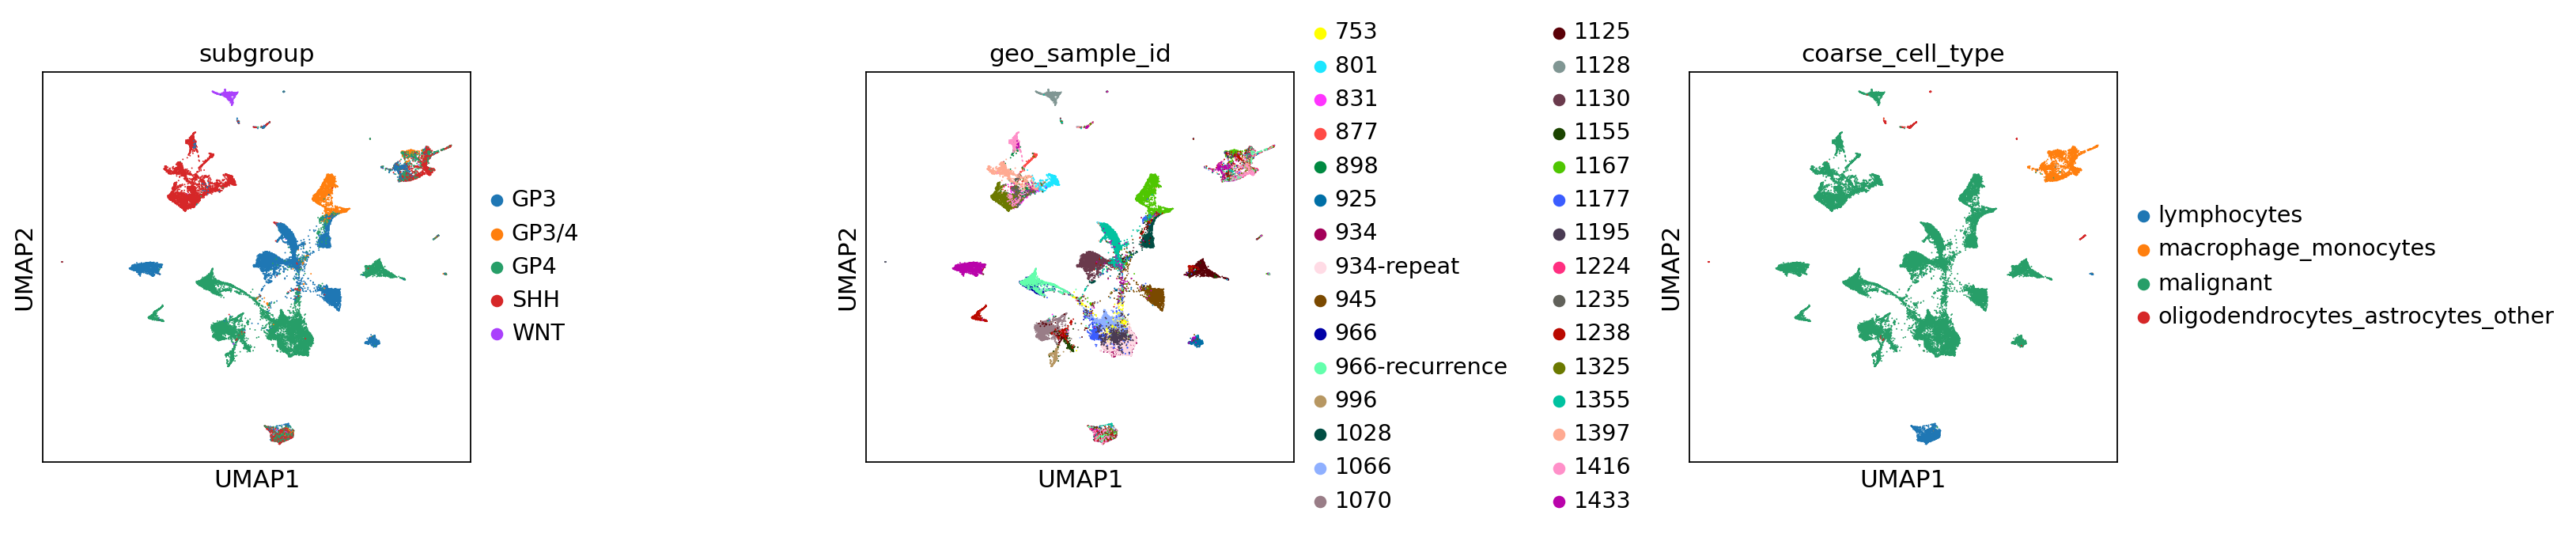

In [8]:
sc.pl.umap(source_adata, color=["subgroup", 'geo_sample_id', "coarse_cell_type"], wspace = 0.75, save = "RiemondyEtal_UMAP_ingest.pdf")

In [9]:
# sc.tl.ingest(target_adata, source_adata, obs='subgroup')
sc.tl.ingest(target_adata, source_adata, obs='coarse_cell_type')

/home/przybilm/.local/lib/python3.7/site-packages/numba/core/typed_passes.py:332: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../.local/lib/python3.7/site-packages/umap/nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  state.func_ir.loc))
/home/przybilm/.local/lib/python3.7/site-packages/numba/core/typed_passes.py:332: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../.local/lib/python3.7/site-packages/umap/nndescent.py", line

In [10]:
# target_adata.uns['subgroup_colors'] = source_adata.uns['subgroup_colors']  # fix colors
target_adata.uns['coarse_cell_type_colors'] = source_adata.uns['coarse_cell_type_colors']  # fix colors

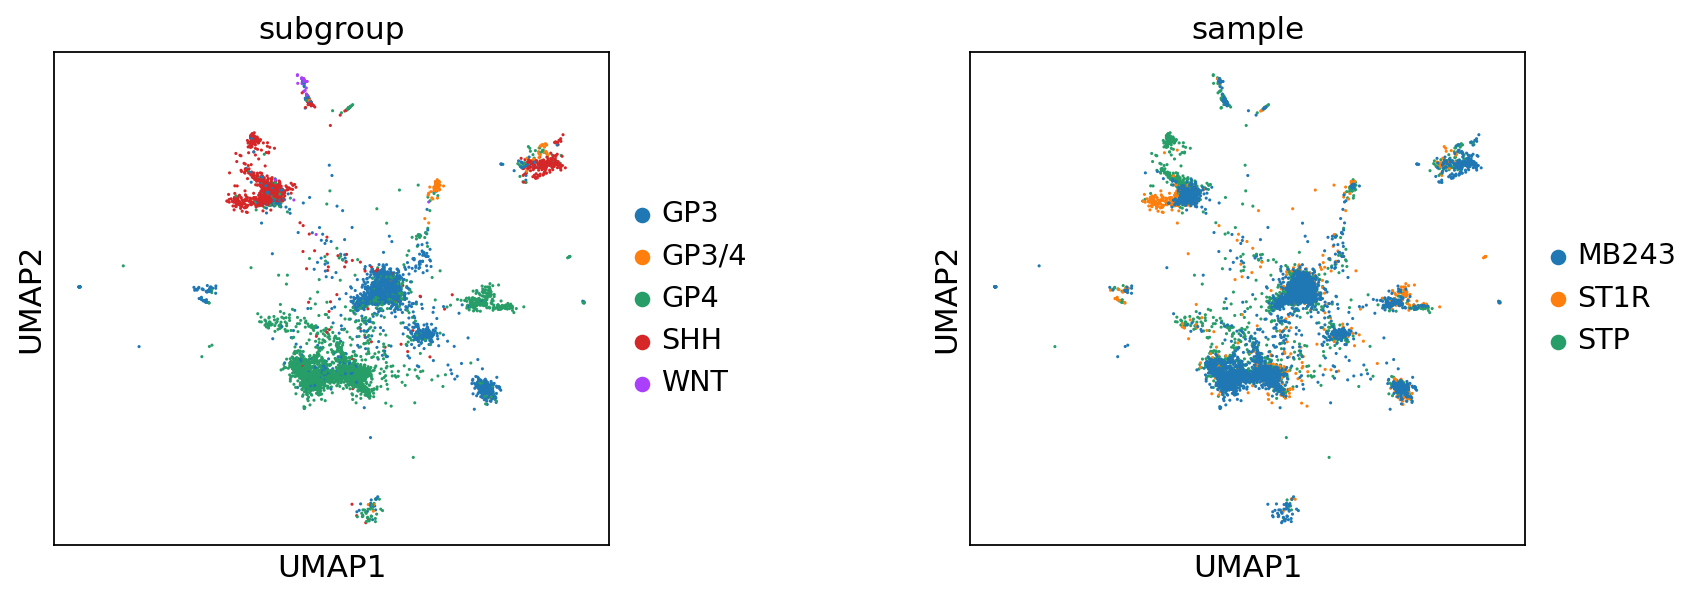

In [11]:
# sc.pl.umap(target_adata, color=['subgroup', 'sample'], wspace=0.5, save = "Nuclei_Riemondy_UMAP.pdf")
sc.pl.umap(target_adata, color=['coarse_cell_type', 'sample'], wspace=0.5, save = "Nuclei_Riemondy_Celltypes_UMAP.pdf")

In [12]:
adata_concat = source_adata.concatenate(target_adata, batch_categories=['ref', 'new'])

In [13]:
adata_concat.obs.subgroup = adata_concat.obs.subgroup.astype('category')
adata_concat.obs.subgroup.cat.reorder_categories(source_adata.obs.subgroup.cat.categories, inplace=True)  # fix category ordering
# adata_concat.uns['subgroup_colors'] = source_adata.uns['subgroup_colors']  # fix category colors
adata_concat.uns['coarse_cell_type_colors'] = source_adata.uns['coarse_cell_type_colors']  # fix category colors

... storing 'cell' as categorical
... storing 'leiden' as categorical
... storing 'scrublet__predicted_multiplet' as categorical


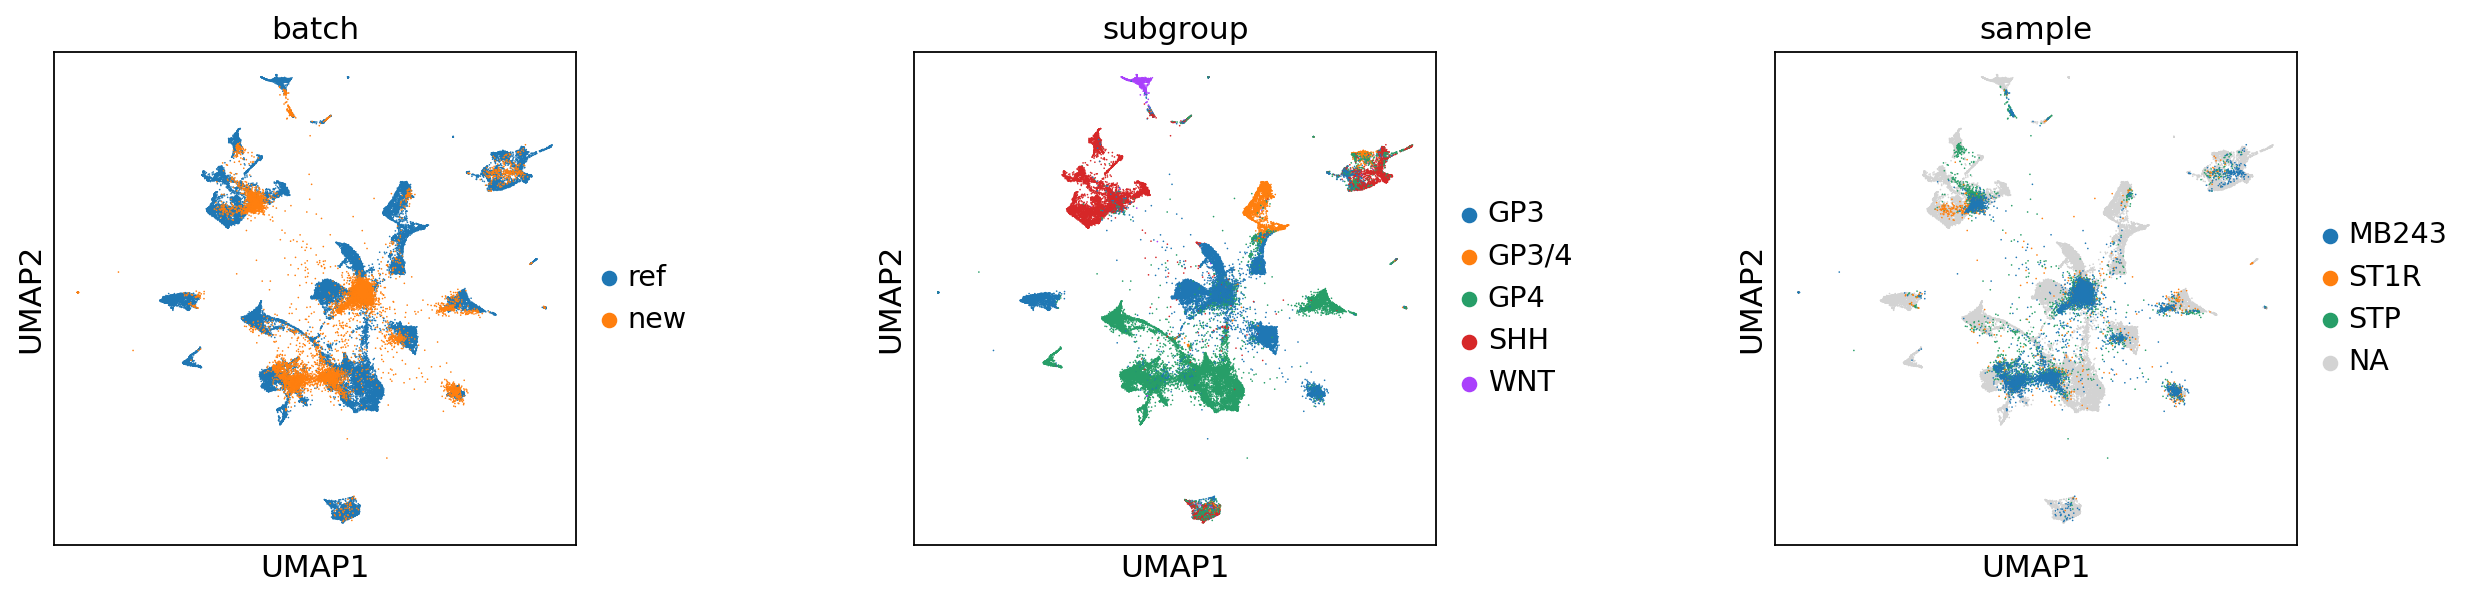

In [14]:
# sc.pl.umap(adata_concat, color=['batch', 'subgroup', 'sample'], wspace = 0.5, save = "Nuclei_RiemondyEtal_UMAP_ingest.pdf")
sc.pl.umap(adata_concat, color=['batch', 'subgroup', 'sample'], wspace = 0.5, save = "Nuclei_RiemondyEtal_UMAP_ingest_Celltypes.pdf")

In [15]:
adata_concat

AnnData object with n_obs × n_vars = 55211 × 1099
    obs: 'cell', 'subgroup', 'UPN', 'additional_info', 'fastq_id', 'coarse_cell_type', 'tumor_subpopulation', 'geo_sample_id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'sample', 'technology', 'patient', 'scrublet__predicted_multiplet', 'scrublet__multiplet_scores', 'scrublet__multiplet_zscores', 'batch', 'louvain', 'Cell_types'
    var: 'mt', 'ribo', 'highly_variable', 'n_cells-new', 'n_cells_by_counts-new', 'mean_counts-new', 'pct_dropout_by_counts-new', 'total_counts-new', 'means-new', 'dispersions-new', 'dispersions_norm-new', 'mean-new', 'std-new', 'gene_ids-new', 'feature_types-new', 'n_cells-ref', 'n_cells_by_counts-ref', 'mean_counts-ref', 'log1p_mean_counts-ref', 'pct_dropout_by_counts-ref', 'total_counts-ref', 'log1p_total_counts-ref', '

In [16]:
# assign the column with the cell_type id in the metadata of the annData object
metadata = pd.DataFrame(adata_concat.obs, index=adata_concat.obs_names)
# metadata.to_csv('/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/Nuclei_projection_Riemondy_metadata.csv')
metadata.to_csv('/omics/groups/OE0540/internal/projects/przybilm/medulloblastoma/revision/scrna_analysis/scanpy/Nuclei_projection_Riemondy_metadata_Celltypes.csv')